Make sure you use the right version number.

In [1]:
%pip install --upgrade scikit-learn==0.23.0

     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.2 MB 1.4 MB/s eta 0:00:06
      --------------------------------------- 0.1/7.2 MB 991.0 kB/s eta 0:00:08
     - -------------------------------------- 0.2/7.2 MB 1.2 MB/s eta 0:00:06
     - -------------------------------------- 0.3/7.2 MB 1.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/7.2 MB 2.1 MB/s eta 0:00:04
     --- ------------------------------------ 0.6/7.2 MB 2.2 MB/s eta 0:00:04
     --- ------------------------------------ 0.7/7.2 MB 2.1 MB/s eta 0:00:04
     ----- ---------------------------------- 1.0/7.2 MB 2.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.0/7.2 MB 2.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.0/7.2 MB 2.9 MB/s eta 0:00:03
     ------- -------------------------------- 1.4/7.2 MB 2.7 MB/s eta 0:00:03
     -------- ------------------------------- 1.5/7.2 MB 2.9 MB/s eta

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [1017 lines of output]
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
    Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
    Using cached setuptools-68.2.2-py3-none-any.whl.metadata (6.3 kB)
    Obtaining d

Once installed, we can load the data.

In [8]:
#ERROR code
# from sklearn.datasets import load_boston
# X, y = load_boston(return_X_y=True)

In [7]:
#GPT code
import pandas as pd
import numpy as np

# Fetch the Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Now, you can use this 'data' and 'target' in your machine learning tasks

Next, we can apply models! 

In [12]:
#ERROR code
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LinearRegression

# from sklearn.datasets import load_boston
# X, y = load_boston(return_X_y=True)

# mod = LinearRegression()
# mod.fit(X, y)
# mod.predict(X)[:3]

In [13]:
#GPT code
import pandas as pd
import numpy as np

# Fetch the Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Now, you can use this 'data' and 'target' in your machine learning tasks


In [18]:
from sklearn.neighbors import KNeighborsRegressor

# Define your feature data (X) and target data (y)
X = data  # Replace with your actual feature data
y = target   # Replace with your actual target data

# Create a KNeighborsRegressor model
mod = KNeighborsRegressor()

# Fit the model to your data
mod.fit(X, y)

# Make predictions on your data
predictions = mod.predict(X)

# Print the first three predictions
print(predictions[:3])


[21.78 22.9  25.36]


Maybe we should inspect the results.

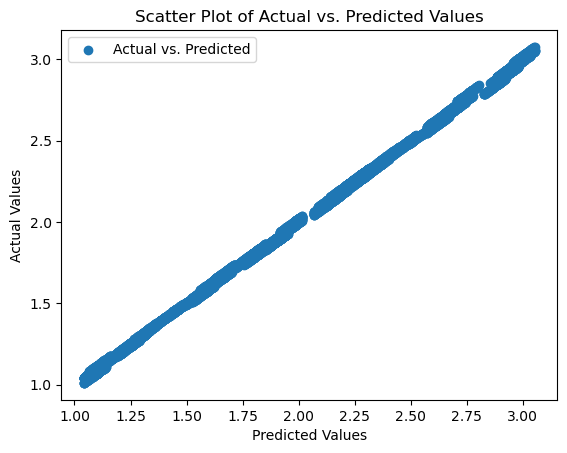

In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Generate synthetic data for demonstration
np.random.seed(0)
X = np.random.rand(100, 1)  # Feature data
y = 2 * X + 1 + 0.1 * np.random.rand(100)  # Target data (with some noise)

# Create and fit the KNeighborsRegressor model
mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)

# Create a scatter plot of pred vs. y
plt.scatter(pred, y, label='Actual vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()

Let's put everything into a pipeline.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = load_boston(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's also apply some settings!

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = load_boston(return_X_y=True)

# If n_neighbors = 1, we're totally cheating with the chart below.
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's now use a gridsearch!

In [ ]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)
mod.fit(X, y);

In [ ]:
pd.DataFrame(mod.cv_results_)

Finally, lets remember that we should look at the data.

In [ ]:
print(load_boston()['DESCR'])